In [1]:
import altair as alt 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('SimplifiedMapData.xlsx')

df.head()

df

,open_dt,Year,ontime,case_status,subject,reason,type,department,submittedphoto,pwd_district,city_council_district,neighborhood,neighborhood_services_district,location_street_name,location_zipcode,latitude,longitude,source
0,1/20/2021 21:31,2021,ONTIME,Open,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,7,3,Dorchester,7,INTERSECTION Florida St & Ashmont St,NaN,42.3594,-71.0587,Constituent Call
1,1/25/2021 23:06,2021,ONTIME,Open,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,1C,9,South End,6,INTERSECTION W Concord St & Shawmut Ave,NaN,42.3594,-71.0587,Constituent Call
2,2/12/2021 15:47,2021,ONTIME,Closed,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,3,3,Dorchester,7,10 Trescott St,2125.0,42.3156,-71.0605,Constituent Call
3,2/23/2021 22:50,2021,ONTIME,Open,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,1C,7,South End,6,215 W Springfield St,2118.0,42.3407,-71.0803,Constituent Call
4,2/25/2021 13:34,2021,ONTIME,Open,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,1B,7,Back Bay,3,INTERSECTION William Cardinal O'Connell Way & ...,NaN,42.3594,-71.0587,Constituent Call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,9/4/2019 15:53,2019,ONTIME,Open,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,1C,9,South End,6,INTERSECTION Wellington St & Columbus Ave,NaN,42.3594,-71.0587,Constituent Call
71,9/15/2019 2:51,2019,ONTIME,Closed,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,7,3,Dorchester,7,30-32 Beach St,2122.0,42.3594,-71.0587,Constituent Call
72,10/4/2019 14:19,2019,ONTIME,Closed,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,7,4,Dorchester,9,116 Norfolk St,2124.0,42.2881,-71.0766,Constituent Call
73,12/2/2019 14:37,2019,ONTIME,Open,Boston Police Department,Noise Disturbance,Automotive Noise Disturbance,INFO,NaN,1C,2,South End,4,INTERSECTION E Berkeley St & Harrison Ave,NaN,42.3594,-71.0587,Constituent Call


In [3]:
df['neighborhood'].value_counts()

Dorchester      32
Back Bay        15
Roxbury         13
South End       12
South Boston     3
Name: neighborhood, dtype: int64

In [4]:
df2= pd.read_excel('SmallMapData.xlsx')

df2

,Year,Site Name (of Overall AQI),Overall AQI Value\t,PM25,Latitude,Longitude
0,2019,BOSTON KENMORE SQ,35.466667,32.200000,42.348873,-71.097163
1,2019,DUDLEY SQUARE ROXBURY,38.710204,33.383673,42.329500,-71.082600
2,2019,VON HILLERN ST,41.742857,40.971429,42.325186,-71.056061
3,2020,BOSTON KENMORE SQ,35.791667,34.708333,42.348873,-71.097163
4,2020,DUDLEY SQUARE ROXBURY,38.093525,30.129496,42.329500,-71.082600
5,2020,VON HILLERN ST,39.896552,39.320197,42.325186,-71.056061
6,2021,BOSTON KENMORE SQ,40.941176,40.058824,42.348873,-71.097163
7,2021,DUDLEY SQUARE ROXBURY,36.447853,29.226994,42.329500,-71.082600
8,2021,VON HILLERN ST,40.615385,39.623932,42.325186,-71.056061


<AxesSubplot:xlabel='Year', ylabel='PM25'>

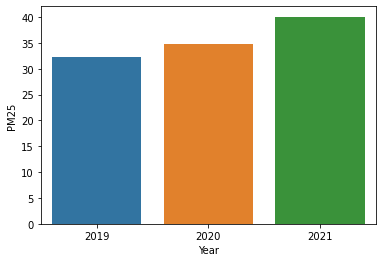

In [5]:
df2.PM25 = df2.PM25.round(2)

BK = df2[df2['Site Name (of Overall AQI)'] == "BOSTON KENMORE SQ"]
BK
sns.barplot(data=BK, x="Year", y="PM25")

<AxesSubplot:xlabel='Year', ylabel='PM25'>

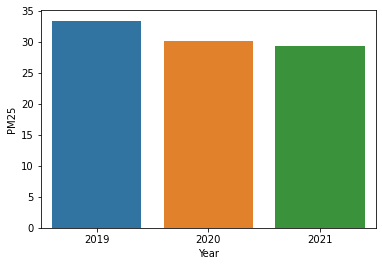

In [6]:
DSR = df2[df2['Site Name (of Overall AQI)'] == "DUDLEY SQUARE ROXBURY"]

sns.barplot(data = DSR, x="Year", y="PM25")

<AxesSubplot:xlabel='Year', ylabel='PM25'>

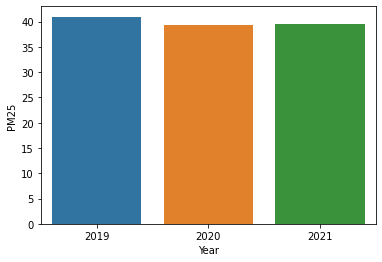

In [7]:
VHS = df2[df2['Site Name (of Overall AQI)'] == "VON HILLERN ST"]

sns.barplot(data = VHS, x="Year", y="PM25")

In [18]:
boston_url = "https://raw.githubusercontent.com/lsouth/DS4200/main/Boston_Neighborhoods.json"

boston = alt.topo_feature(boston_url, feature='Boston_Neighborhoods')

alt.Chart(boston).mark_geoshape(fill="lightgray",stroke="white"
).properties(
    width=500,
    height=500
)

alt.Chart(...)

In [9]:
alt.Chart(df).mark_point().encode(
    x="latitude",
    y="longitude"
)

alt.Chart(...)

In [10]:
alt.Chart(df2).mark_point().encode(
    x="Latitude", 
    y="Longitude"



)

alt.Chart(...)

In [11]:
background = alt.Chart(boston).mark_geoshape(fill="lightgray",stroke="white"
).encode(
    tooltip="properties.Name:N"
).properties(
    title="Locations of Noise Complaint by Cars in Suffolk County",
    width=500,
    height=500
    
)
background

alt.Chart(...)

In [22]:
selection = alt.selection_multi(fields=['Year'], bind='legend') 

points = alt.Chart(df, title = "Locations of Noise Complaint by Cars in Suffolk County").mark_circle().encode(
    latitude="latitude:Q",
    longitude="longitude:Q",
    size=alt.value(20),
    color = alt.Color('Year:O', scale=alt.Scale(scheme='dark2')),
    tooltip="location_street_name", 
    opacity = alt.condition(selection, alt.value(1), alt.value(0))
).add_selection(
    selection
)
points

alt.Chart(...)

In [19]:
selection = alt.selection_multi(fields=['Year'], bind='legend') 

points2 = alt.Chart(df2).mark_square().encode(
    latitude="Latitude:Q", 
    longitude="Longitude:Q", 
    size=alt.value(30),
    opacity = alt.condition(selection, alt.value(1), alt.value(0))
).add_selection(
    selection

)
points2

#https://github.com/altair-viz/altair/issues/890 

alt.Chart(...)

In [23]:
#full_chart = background + points + points2
#full_chart

years = ['2019', '2020', '2021']

# # A dropdown filter
# year_dropdown = alt.binding_select(options=years)
# year_select = alt.selection_single(fields=['Year_Year'], bind=year_dropdown, name="Year")

# filter_year = full_chart.add_selection(
#     year_select
# ).transform_filter(
#     year_select
# ).properties(title="Dropdown Filtering")

# (filter_year)


selection = alt.selection_multi(fields=['Year'], bind='legend')

full_chart = background + points + points2
full_chart.add_selection(
    selection
)

#https://altair-viz.github.io/gallery/multiple_interactions.html 

alt.LayerChart(...)

In [15]:
#chart = (filter_year)

#chart.save('chart.html')